In [9]:
# import xml.etree.ElementTree as ET
# tree = ET.parse("Untitled-1.xml")
import numpy as np
import matplotlib.pyplot as plt

%matplotlib widget


In [2]:
import requests
from bs4 import BeautifulSoup
from unicodedata import normalize
import unidecode
import json

In [5]:
alle = {}
for år in range(2000,2015):
    URL = f"https://www.finn.no/car/used/search.html?model=1.817.1444&year_from={år}&year_to={år}"
    page = requests.get(URL)
    soup = BeautifulSoup(page.content, "html.parser")
    
    namn = [a.get_text() for a in soup.findAll("h2")]

    # https://stackoverflow.com/questions/74335437/beautifulsoup-split-text-from-tag

    info = [[t.strip() for t in normalize('NFKD',a.get_text(separator=";")).split(";")] for a in soup.findAll("div", class_="mb-8 flex justify-between whitespace-nowrap font-bold")]
    # normalize('NFKD', soup.find("div", class_="mb-8 flex justify-between whitespace-nowrap font-bold").text)

    alle[år] = [[a[0],a[1][1],a[1][3]] for a in zip(namn,info)]


In [46]:

with open("alle.json",'r') as f:
    alle = json.load(f)

In [36]:
for y in range(2000,2015):
    for i,a in enumerate(alle[y]):
        if a[-1] == 'Solgt':
            print(y,i,a)
            # alle[y].pop(i)

In [17]:
np.asarray([int(b[1].replace(" ","")) for b in alle[2000]])

array([389000, 232790, 297995, 191257])

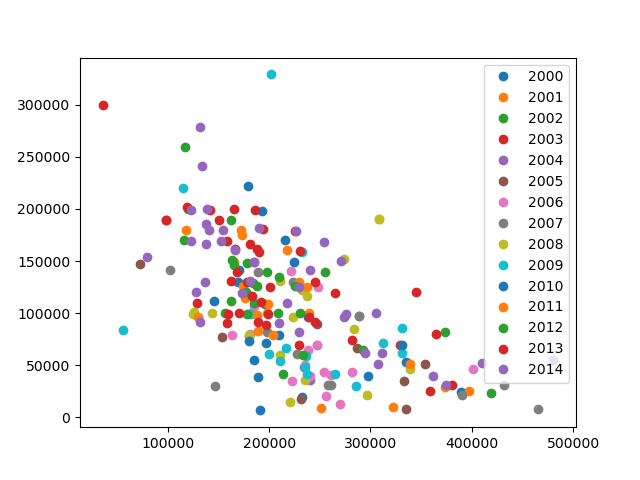

In [38]:
fig, ax = plt.subplots()

for a,b in alle.items():
    ax.plot([int(c[1].replace(" ","")) for c in b],[int(c[2].replace(" ","")) for c in b],'o',label=a)
ax.legend()

In [40]:
import json
with open("alle.json",'w') as f:
    json.dump(alle,f)